# Pauli Matrices and the Bloch Sphere

In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_vector

In this section we'll further develop the topics introduced in the last, and introduce a useful visualization of single-qubit states.

### Pauli matrices

Wherever there are vectors, matrices are not far behind. The three important matrices for qubits are known as the Pauli matrices.

$$
X= \begin{pmatrix} 0&1 \\\\ 1&0 \end{pmatrix}\\\\
Y= \begin{pmatrix} 0&-i \\\\ i&0 \end{pmatrix}\\\\
Z= \begin{pmatrix} 1&0 \\\\ 0&-1 \end{pmatrix}
$$

These have many useful properties, as well as a deep connection to the x, y and z measurements. Specifically, we can use them to calculate the three quantities used in the last section:
$$\langle a | X | a\rangle = p^x_0 (|a\rangle)-p^x_1(|a\rangle),\\\\
\langle a | Y | a\rangle = p^y_0 (|a\rangle)-p^y_1(|a\rangle),\\\\
\langle a | Z | a\rangle = p^z_0 (|a\rangle)-p^z_1(|a\rangle).
$$

These quantities are known as the expectation values of the three matrices. In calculating them, we make use of standard matrix multiplication.

Typically, we prefer to use a more compact notation for the quantities above. Since we usually know what state we are talking about in any given situation, we don't explicitly write it in. This allows us to write $\langle X \rangle = \langle a|X|a \rangle$, etc. Our statement from the last section, regarding the conservation of certainty for an isolated qubit, can then be written

$$
\langle X \rangle^2 + \langle Y \rangle^2 + \langle Z \rangle^2 = 1.
$$

To calculate these values in Qiskit, we first need a single qubit circuit to analyze.

In [2]:
qc = QuantumCircuit(1)

Then we need to define the x, y and z measurements.

In [3]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0);

# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0);

Finally we can run the circuit with each kind of measurement, calculate the probabities and use them to determine $\langle X \rangle$, $\langle Y \rangle$ and $\langle Z \rangle$. This requires a process largely similar to the one used in the last section to calculate total certainty.

Here we place the results in a list called ```bloch_vector```, for which ```bloch_vector[0]``` is $\langle X \rangle$, ```bloch_vector[1]``` is $\langle Y \rangle$ and ```bloch_vector[2]``` is $\langle Z \rangle$

In [4]:
shots = 2**14 # number of samples used for statistics

bloch_vector = []
for measure_circuit in [measure_x, measure_y, measure_z]:
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )

### The Bloch sphere

Let's take a moment to think a little about the numbers $\langle X \rangle$, $\langle Y \rangle$ and $\langle Z \rangle$. Though their values depend on what state our qubit is in, they are always constrained to be no larger than 1, and no smaller than -1. They also collectively obey the condition $\langle X \rangle^2 + \langle Y \rangle^2 + \langle Z \rangle^2 = 1$.

The same properties are also shared by another set of three numbers that we know from a completely different context. To see what they are, first consider a sphere. For this, we can describe every point on the surface in terms of its x, y and z coordinates. We'll place the origin of our coordinate system at the center of the sphere. The coordinates are then constrained by the radius in both directions: they can be no greater than $r$ , and no less than $-r$ . For simplicity, let's set the radius to be $r=1$.

For any point, the distance from the center of the sphere can be determined by the 3D version of Pythagoras' theorem. Specifically, $x^2 + y^2 + z^2$. For points on the surface, this distance is always 1.

So now we have three numbers that can each be no greater than 1, no less than -1, and for which the sum of the squares is always 1. All exactly the same as $\langle X \rangle$, $\langle Y \rangle$ and $\langle Z \rangle$. They even have pretty much the same names as these values. 

Because of this correspondence, we can apply all our existing knowledge and intuition about balls to our understanding of qubits. Specifically, we can visualize any single-qubit state as a point on the surface of a sphere. We call this the Bloch sphere.

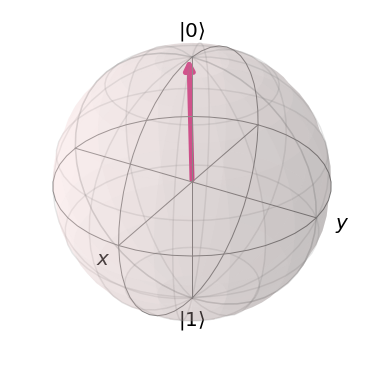

In [5]:
plot_bloch_vector( bloch_vector )

We usually associate $|0\rangle$ with the north pole, $|1\rangle$ with the south, and the states for the x and y measurements around the equator. Any pair of orthogonal states correspond to diametrically opposite points on this sphere.

As we'll see in future sections, the Bloch sphere makes it easier to understand single-qubit operations. Each moves points around on the surface of the sphere, and so can be interpreted as a simple rotation.